In [1]:
import cv2
import numpy as np
from ultralytics import YOLO

In [2]:
model = YOLO("../model.pt")

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

def draw_bounding_boxes(file_name, results):
    image = Image.open(file_name)

    fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(image)

    for box in results[0].boxes:
        cls_id = int(box.cls[0])
        x1, y1, x2, y2 = box.xyxy[0]
        class_name = results[0].names[cls_id]
        confidence = box.conf[0]

        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor="y", facecolor="none")
        ax.add_patch(rect)

        ax.text(x1, y1 - 5, f"{class_name} ({confidence:.2f})", color="yellow", fontsize=10, weight="bold")

    plt.axis('off')
    plt.show()

In [4]:
def list_humans(results):
    for result in results:
        boxes = result.boxes
        for box in boxes:
            cls_id = int(box.cls[0])
            confidence = box.conf[0]
            x1, y1, x2, y2 = box.xyxy[0]

            class_name = result.names[cls_id]

            print(f"Class: {class_name}, Confidence: {confidence:.2f}, Coords: {x1:.0f}, {y1:.0f}, {x2:.0f}, {y2:.0f}")


image 1/1 /Users/berkay/Desktop/Yüksek Lisans/her şey/model/test/file1.jpg: 224x320 2 Humans, 16.8ms
Speed: 0.8ms preprocess, 16.8ms inference, 0.5ms postprocess per image at shape (1, 3, 224, 320)


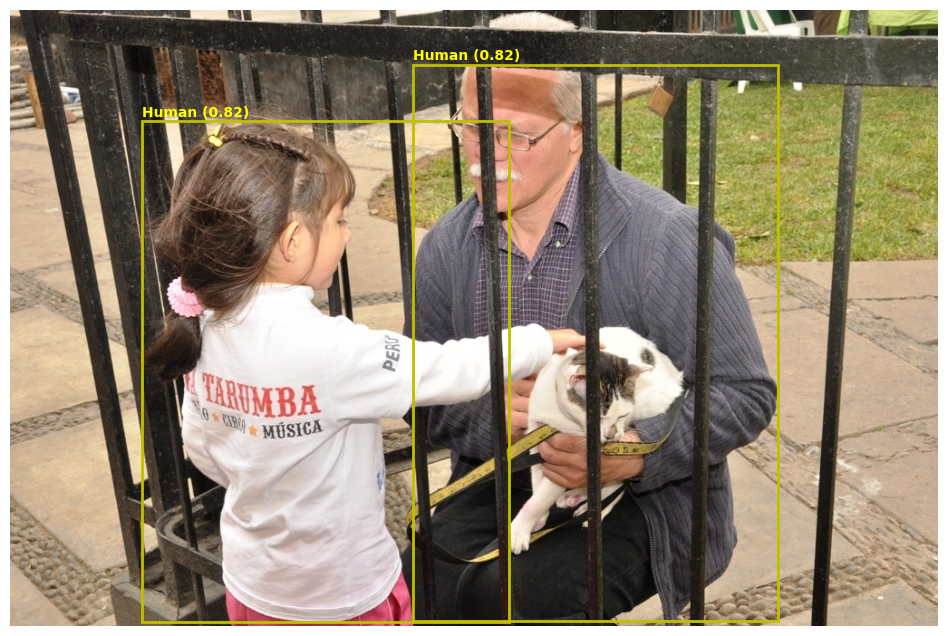

Class: Human, Confidence: 0.82, Coords: 445, 60, 847, 674
Class: Human, Confidence: 0.82, Coords: 146, 122, 551, 675


In [5]:
file1 = "file1.jpg"

results = model.predict(source=file1, conf=0.1)
draw_bounding_boxes(file1, results)
list_humans(results)



image 1/1 /Users/berkay/Desktop/Yüksek Lisans/her şey/model/test/file2.jpg: 320x224 2 Humans, 27.1ms
Speed: 2.1ms preprocess, 27.1ms inference, 0.6ms postprocess per image at shape (1, 3, 320, 224)


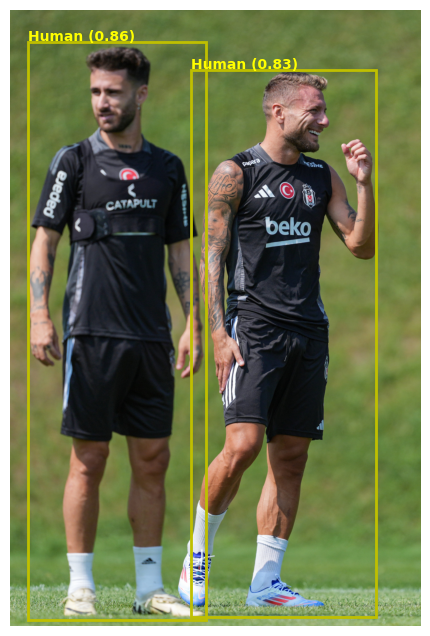

Class: Human, Confidence: 0.86, Coords: 96, 166, 1018, 3168
Class: Human, Confidence: 0.83, Coords: 937, 313, 1902, 3153


In [6]:
file2 = "test0.jpg"

results = model.predict(source=file2, conf=0.1)
draw_bounding_boxes(file2, results)
list_humans(results)



image 1/1 /Users/berkay/Desktop/Yüksek Lisans/her şey/model/test/file3.jpg: 224x320 30 Humans, 13.5ms
Speed: 0.5ms preprocess, 13.5ms inference, 0.3ms postprocess per image at shape (1, 3, 224, 320)


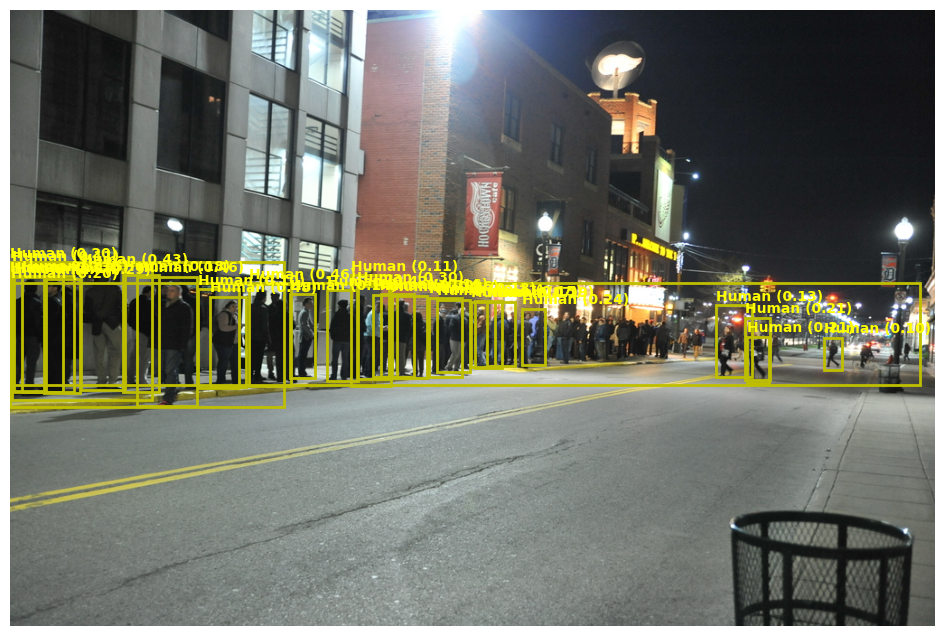

Class: Human, Confidence: 0.48, Coords: 221, 317, 261, 417
Class: Human, Confidence: 0.46, Coords: 264, 303, 310, 416
Class: Human, Confidence: 0.46, Coords: 140, 295, 207, 437
Class: Human, Confidence: 0.43, Coords: 78, 286, 127, 420
Class: Human, Confidence: 0.42, Coords: 351, 310, 385, 410
Class: Human, Confidence: 0.36, Coords: 422, 316, 461, 407
Class: Human, Confidence: 0.33, Coords: 0, 294, 40, 421
Class: Human, Confidence: 0.30, Coords: 384, 305, 419, 408
Class: Human, Confidence: 0.29, Coords: 38, 297, 77, 424
Class: Human, Confidence: 0.24, Coords: 567, 330, 592, 392
Class: Human, Confidence: 0.21, Coords: 813, 340, 841, 409
Class: Human, Confidence: 0.21, Coords: 816, 362, 840, 412
Class: Human, Confidence: 0.20, Coords: 1, 301, 1007, 415
Class: Human, Confidence: 0.20, Coords: 0, 279, 303, 439
Class: Human, Confidence: 0.20, Coords: 402, 315, 428, 406
Class: Human, Confidence: 0.19, Coords: 528, 323, 558, 394
Class: Human, Confidence: 0.18, Coords: 125, 293, 165, 422
Class:

In [7]:
file3 = "file3.jpg"

results = model.predict(source=file3, conf=0.1)
draw_bounding_boxes(file3, results)
list_humans(results)
